# Recrutamento preditivo

A empresa de tecnologia HighTech busca contratar os melhores profissionais do mercado para fazer parte do time e gerar valor para a empresa. A HighTech vem investindo muito nos últimos anos no uso de ciência de dados no setor do RH para trazer ganhos no processo de seleção e recrutamento. O time de ciência de dados junto com o time de RH vem realizando juntos um projeto de recrutamento preditivo.

O recrutamento preditivo é uma técnica de People Analytics para encontrar os melhores candidatos para contratação da empresa, na prática, o recrutamento preditivo aumenta as chances do recrutador potencializar o processo de seleção. Por meio da coleta e análise de dados, é possível avaliar o perfil e o fit cultural dos profissionais para entender se existe uma boa aderência à vaga. 

**Problema de negócio:**

O objetivo da HighTech é identificar quais são os melhores indicadores para realizar o recrutamento de profissionais. 

**Base de dados**

Este conjunto de dados consiste em algumas características como: percentual de ensino médio e superior e especialização, experiência de trabalho e ofertas salariais para os profissionais colocados.

**Desafio**

Você como cientista de dados do time de dados da HighTech tem o desafio de criar um modelo preditivo de recrutamento para prever como e quais são as melhores variáveis que podem colocar um profissional bem qualificado na HighTech.


## Explicação das Colunas da Tabela de Dados

1. **sl\_no** – Número de série (identificador único de cada registro).

2. **gender** – Gênero da pessoa (M = Masculino, F = Feminino).

3. **ssc\_p** – Percentual obtido no ensino médio (nível SSC – Secondary School Certificate).

4. **ssc\_b** – Tipo de escola no ensino médio (ex: Central ou Others).

5. **hsc\_p** – Percentual obtido no ensino médio superior (nível HSC – Higher Secondary Certificate).

6. **hsc\_b** – Tipo de escola no ensino médio superior.

7. **hsc\_s** – Área de estudo no ensino médio superior (Commerce, Science, Arts).

8. **degree\_p** – Percentual obtido na graduação.

9. **degree\_t** – Tipo de curso de graduação (Sci\&Tech, Comm\&Mgmt).

10. **workex** – Experiência de trabalho prévia (Yes = Sim, No = Não).

11. **etest\_p** – Nota em um teste de empregabilidade.

12. **specialisation** – Especialização no MBA (Mkt\&HR = Marketing e RH, Mkt\&Fin = Marketing e Finanças).

13. **mba\_p** – Percentual obtido no MBA.

14. **status** – Situação de colocação profissional (Yes = foi contratado, No = não foi).

15. **salary** – Salário.


In [177]:
### NORMALMENTE USAMOS PARA ANALISAR VARIÁVEIS NÚMERICAS HISTOGRAMAS E BOXPLOT
### PARA AS CATEGÓRICAS SÃO USADOS GRÁFICOS DE BARRAS

In [178]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [179]:
#importando a base de dados
dados = pd.read_excel('Recrutamento.xlsx')
dados.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,No,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Yes,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,No,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,No,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Yes,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Yes,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,No,NaN


Possível observar que há variáveis como gênero, desempenho educaccional, score de desempenho educacional, status da contratação e salário.
A variável target será a coluna status, que define se foi ou não contratado.

In [180]:
dados.shape

(215, 15)

In [181]:
dados.status.unique()

array(['Yes', 'No'], dtype=object)

Analisando os dados

In [182]:
dados.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


Métricas de pontuação sobre ensino:
ssc_p
hsc_p
degree_p
estet_p
mba_p

sl_no é um código, então não faz sentido na análise.

salary vem após a contratação.

Observando valores nulos:


In [183]:
dados.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

<Axes: >

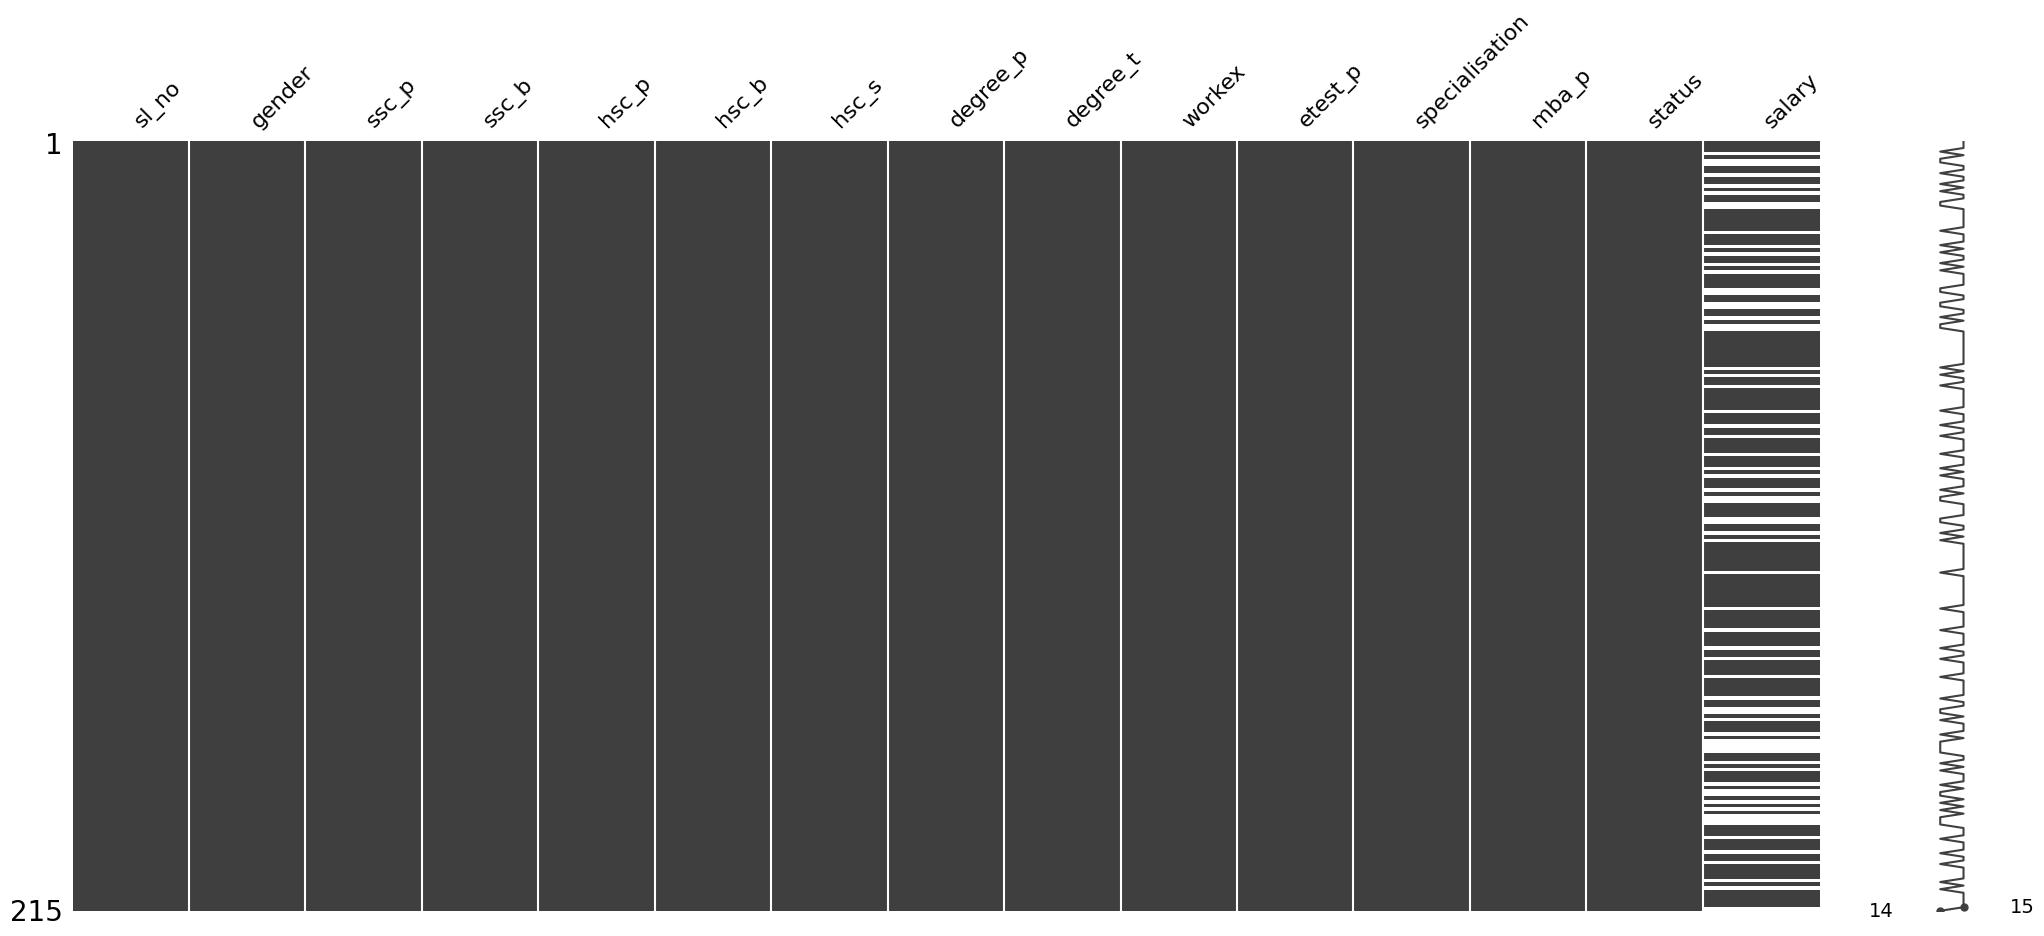

In [184]:
#observando pelo missingno
import missingno as msno
msno.matrix(dados)

C:\Users\luish\AppData\Local\Temp\ipykernel_8244\3723741852.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='status', ylabel='salary'>

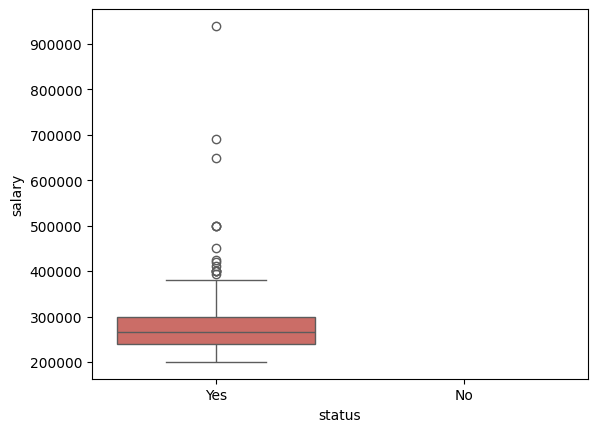

In [185]:
#observando os dados nulos em gráfico:
sns.boxplot(x = 'status', y = 'salary', data= dados, palette = 'hls')

Para a variável salário os valores nulos estão atribuídos para aqueles que foram contratados, caso não contratados não há informação salarial.

Tratando os dados nulos:


In [186]:
dados.salary.fillna(0, inplace=True)
dados.isnull().sum()


C:\Users\luish\AppData\Local\Temp\ipykernel_8244\3438580285.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

Analisando as variáveis numéricas:

<Axes: xlabel='hsc_p', ylabel='Count'>

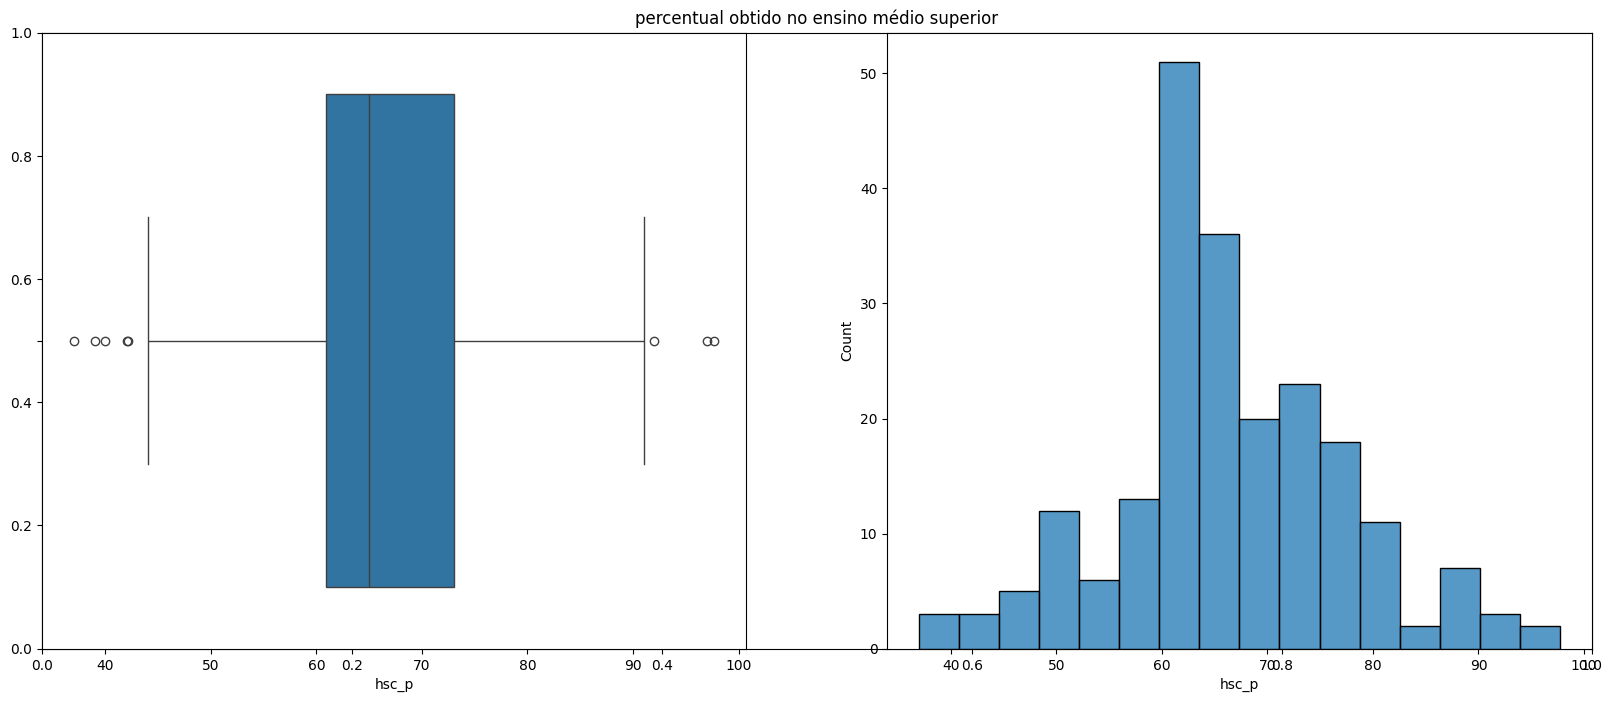

In [187]:
plt.figure(figsize=(20,8))
plt.title('percentual obtido no ensino médio superior')

plt.subplot(1, 2, 1)
sns.boxplot(x = dados['hsc_p'])

plt.subplot(1,2,2)
sns.histplot(x = dados['hsc_p'])


<Axes: xlabel='degree_p', ylabel='Count'>

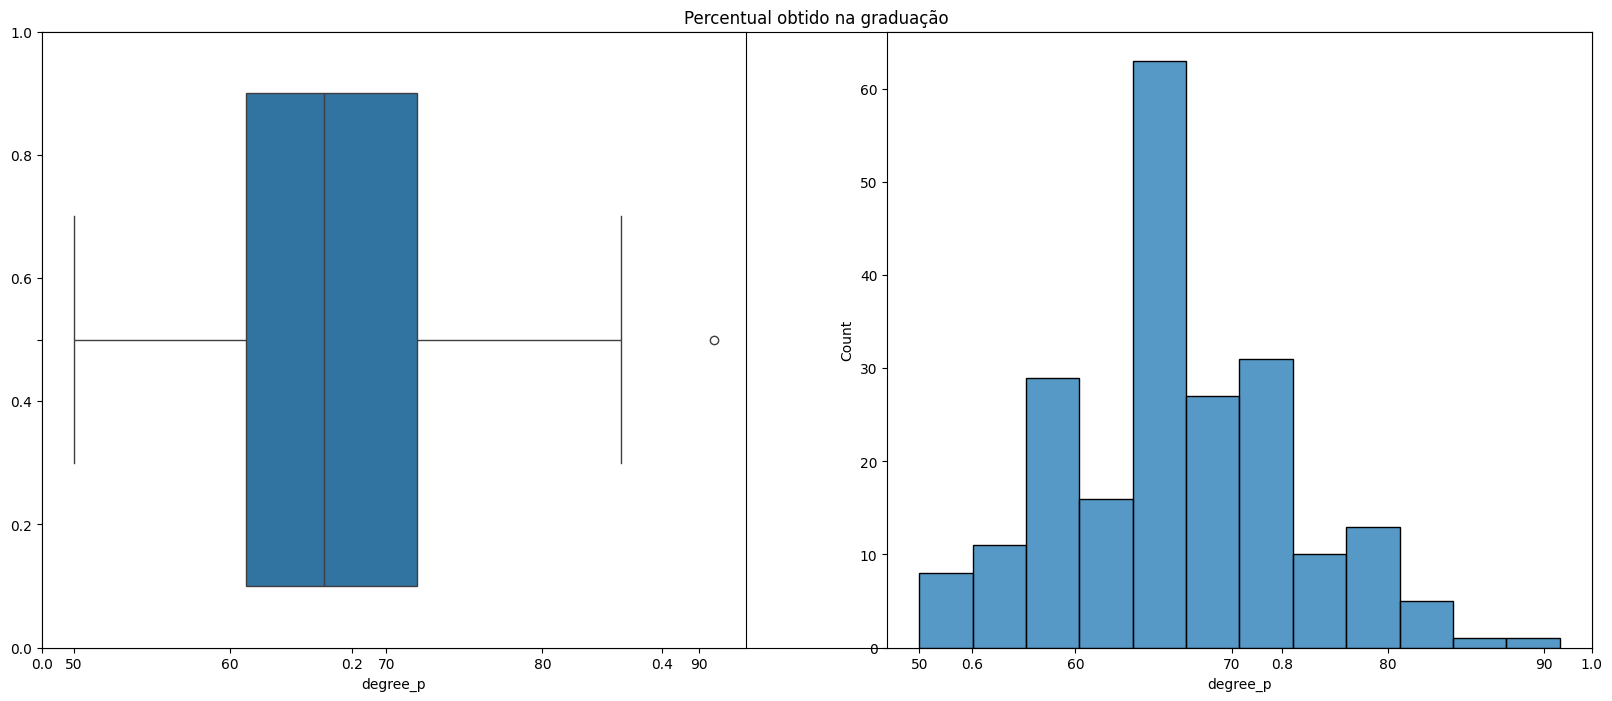

In [188]:
plt.figure(figsize=(20,8))
plt.title('Percentual obtido na graduação')

plt.subplot(1,2,1)
sns.boxplot(data = dados, x = 'degree_p')

plt.subplot(1,2,2)
sns.histplot(data = dados , x = 'degree_p')

<Axes: xlabel='etest_p', ylabel='Count'>

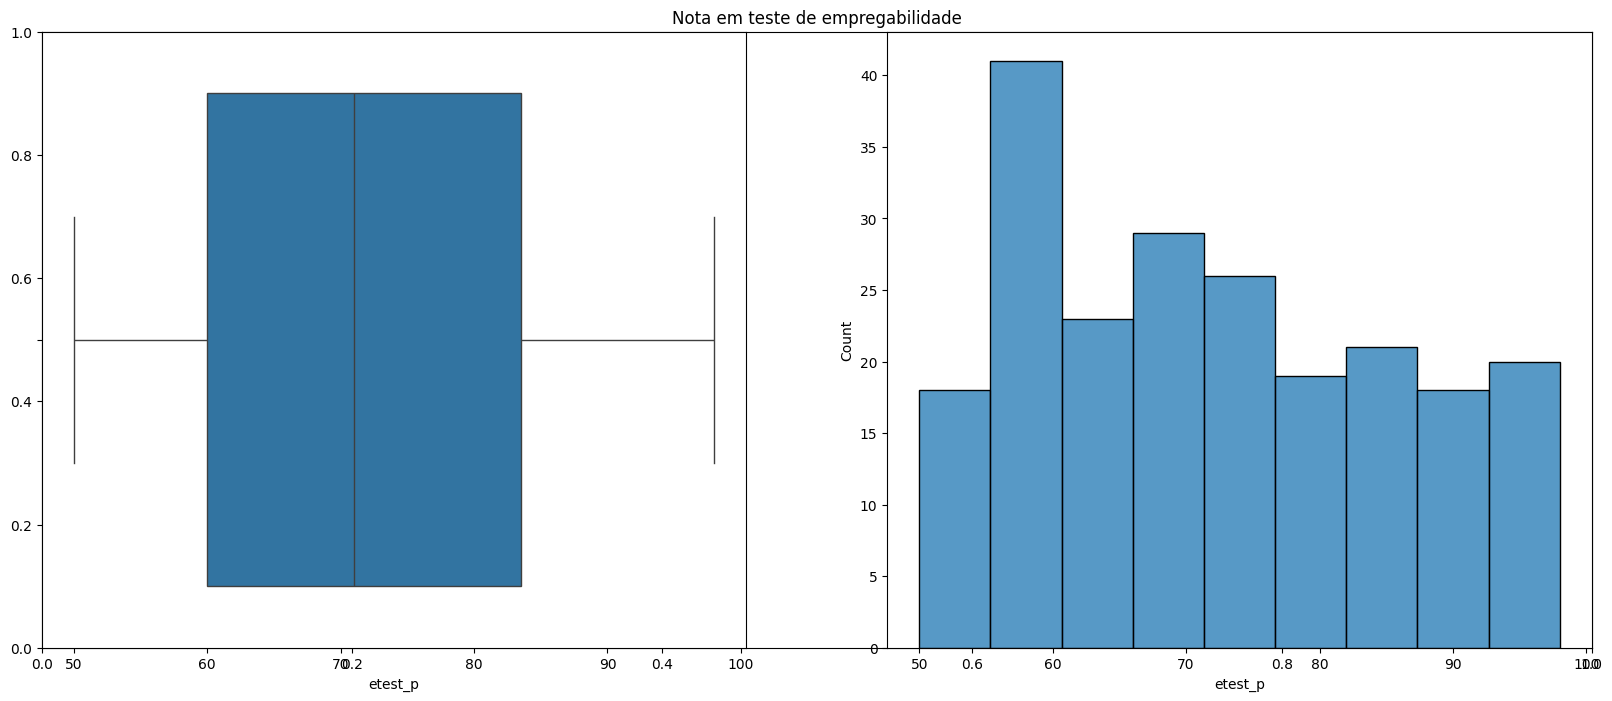

In [189]:
plt.figure(figsize=(20,8))
plt.title('Nota em teste de empregabilidade')

plt.subplot(1,2,1)
sns.boxplot(data=dados, x = 'etest_p')

plt.subplot(1,2,2)
sns.histplot(data = dados, x = 'etest_p')

<Axes: xlabel='mba_p', ylabel='Count'>

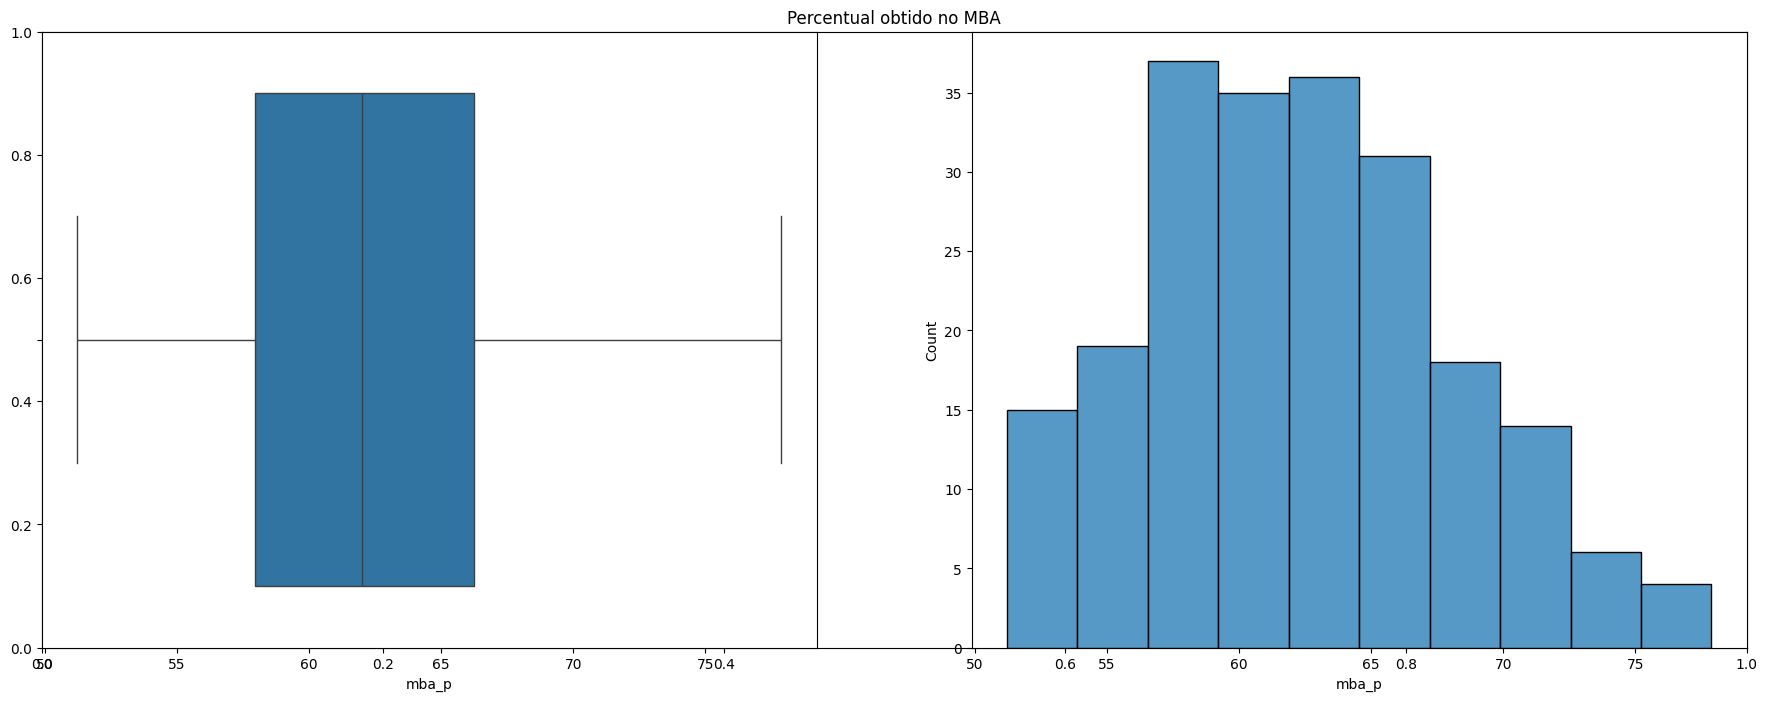

In [190]:
plt.figure(figsize=(22,8))
plt.title('Percentual obtido no MBA')

plt.subplot(1,2,1)
sns.boxplot(data = dados, x = 'mba_p')

plt.subplot(1,2,2)
sns.histplot(data = dados, x = 'mba_p')

<Axes: xlabel='salary', ylabel='Count'>

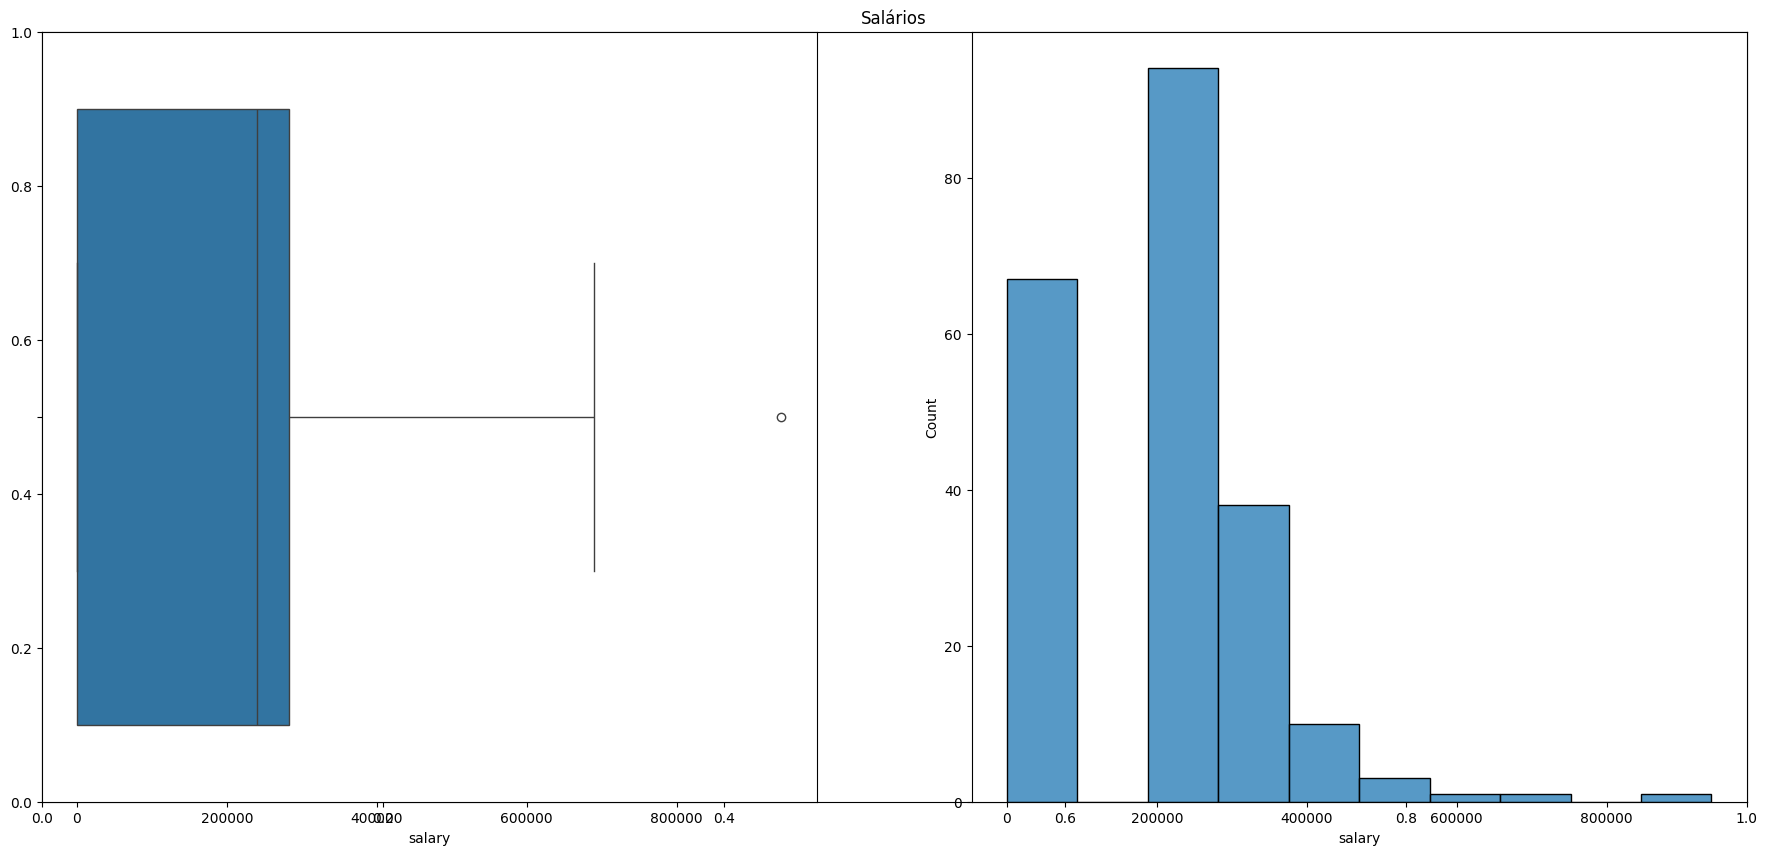

In [191]:
plt.figure(figsize=(22,10))
plt.title('Salários')

plt.subplot(1,2,1)
sns.boxplot(data = dados, x = 'salary')

plt.subplot(1,2,2)
sns.histplot(data = dados, x = 'salary')

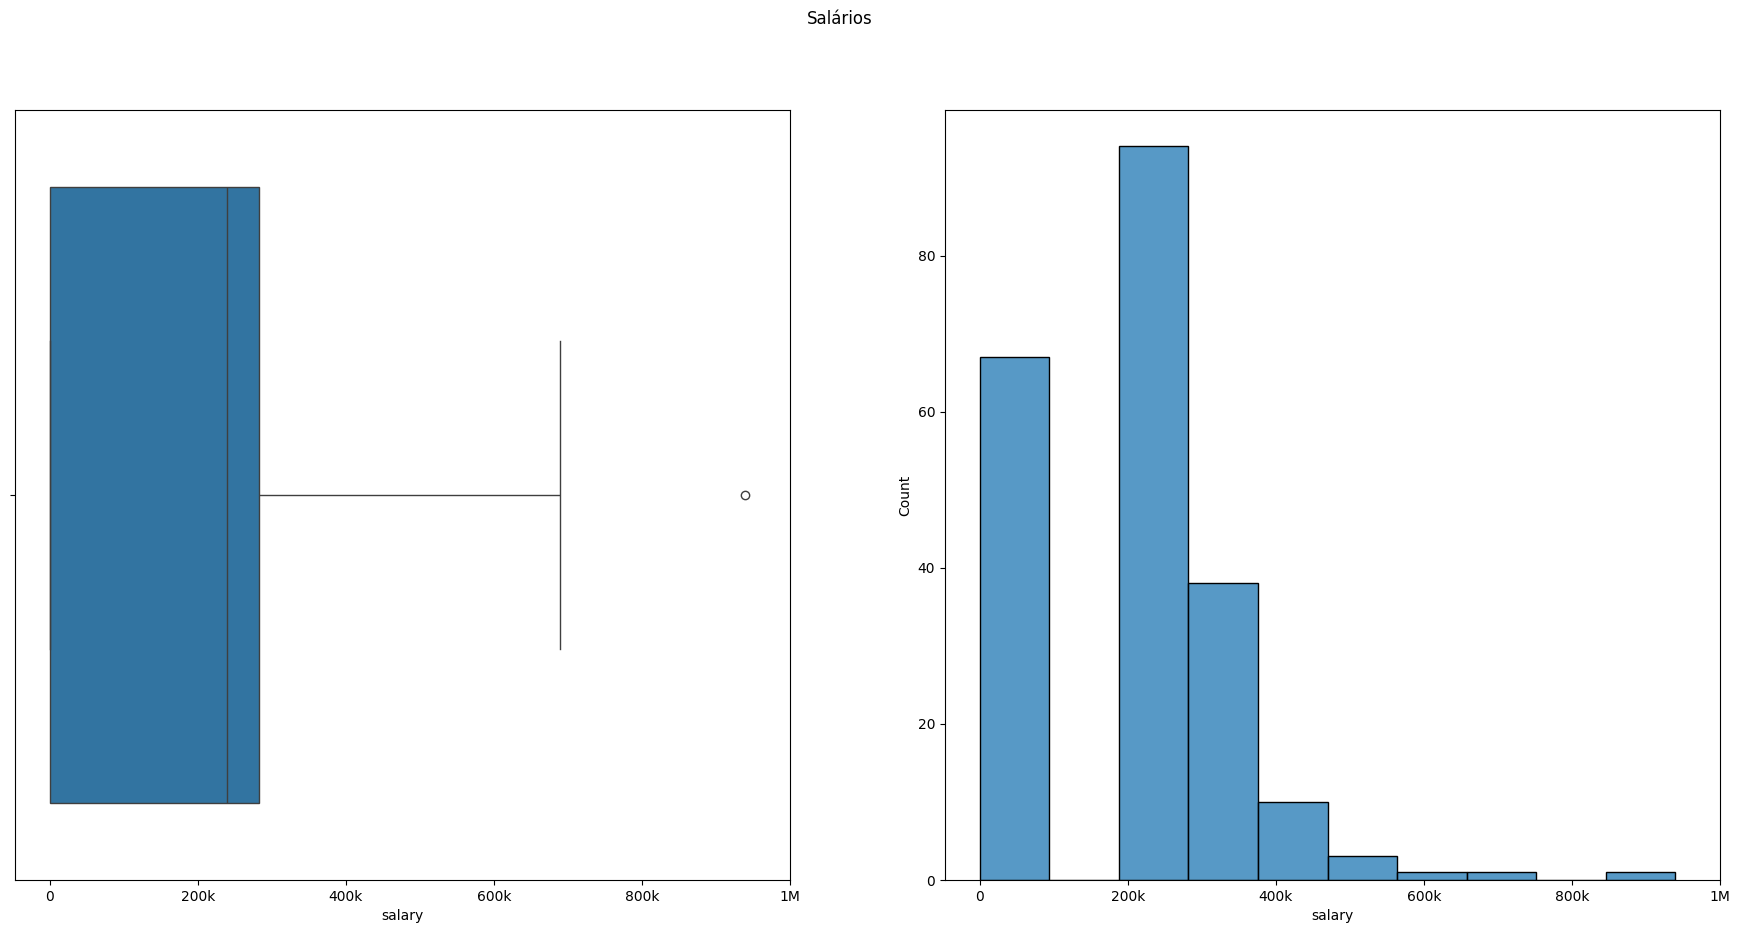

In [192]:
plt.figure(figsize=(22, 10))
plt.suptitle('Salários')  # suptitle em vez de title para abranger os dois subplots

# Boxplot
ax1 = plt.subplot(1, 2, 1)
sns.boxplot(data=dados, x='salary', ax=ax1)
ax1.set_xticks([0, 200000, 400000, 600000, 800000, 1000000])
ax1.set_xticklabels(['0', '200k', '400k', '600k', '800k', '1M'])

# Histograma
ax2 = plt.subplot(1, 2, 2)
sns.histplot(data=dados, x='salary', ax=ax2)
ax2.set_xticks([0, 200000, 400000, 600000, 800000, 1000000])
ax2.set_xticklabels(['0', '200k', '400k', '600k', '800k', '1M'])

plt.show()


 verificando se os resultados acadêmicos e a experiência no trabalho influenciam na contratação.

(50.0, 80.0)

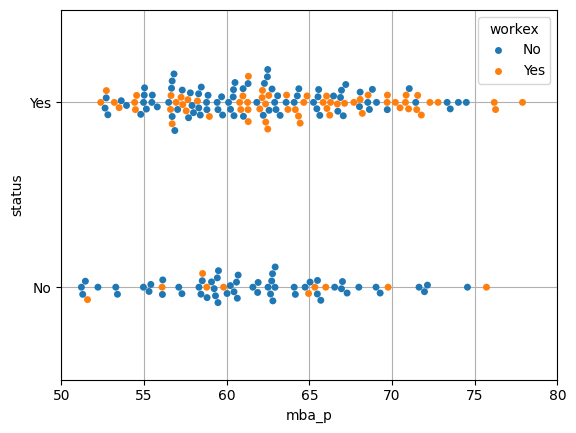

In [193]:
ax = sns.swarmplot(data= dados, x = 'mba_p', y = 'status', hue = 'workex')
ax.grid(True)
ax.set_xlim(50, 80)

Podemos observar que a pontuação de MBA pode influenciar sim na decisão de contratação, temos um grande concetração de dados sobre profissionais que possuem score de mba_p e com experiência de trabalho. 

Agora verificando se a remunerção é maior dependendo do gênero

In [194]:
import plotly_express as px
px.violin(dados,y="salary",x="specialisation",color="gender",box=True,points="all")

Os maiores salários foram dados aos homens.
O salário médio oferecido também foi maior para homens.


Analisando a correlação entre as pontuações de desempenho acadêmico com a contratação

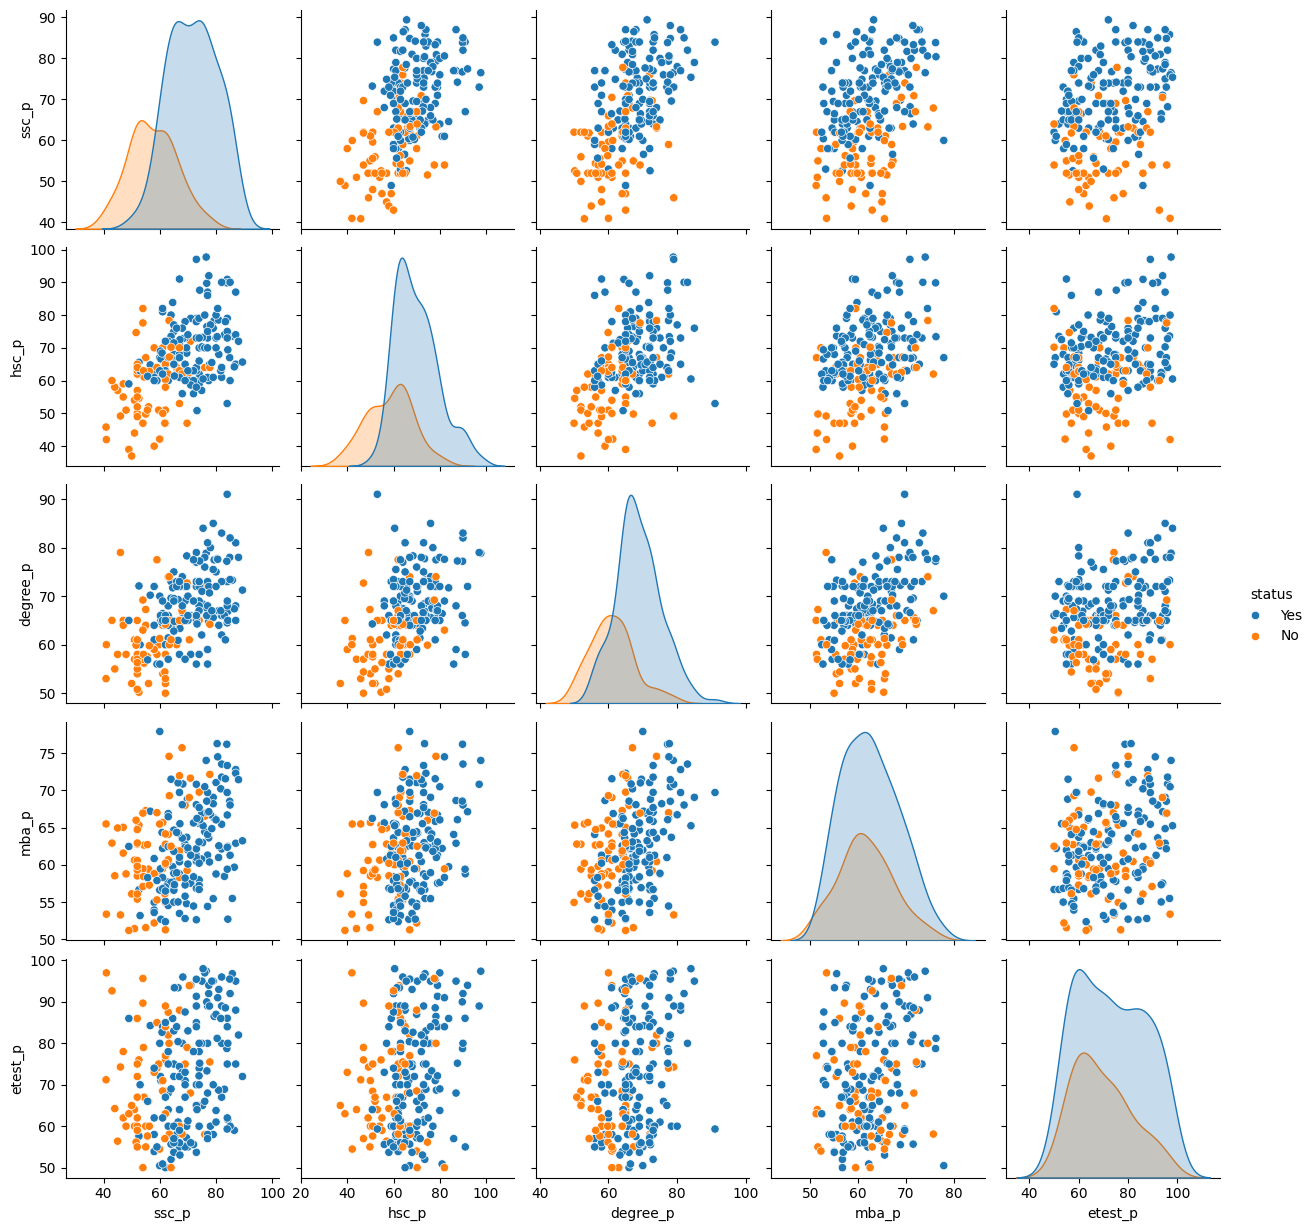

In [195]:
sns.pairplot(dados, vars = ['ssc_p','hsc_p','degree_p','mba_p','etest_p'], hue = 'status')

Aqueles com maiores notas nas suas formações foram contratados

In [196]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Yes,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Yes,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Yes,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,No,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Yes,425000.0


In [197]:
#Transformando as colunas binárias:
colunas = ['gender','workex','specialisation','status', 'ssc_b', 'hsc_b']

for coluna in colunas:
    dados[coluna] = lb.fit_transform(dados[coluna])
    
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,1,67.00,1,91.00,1,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,2,1,79.33,0,78.33,1,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,3,1,65.00,0,68.00,0,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,4,1,56.00,0,52.00,0,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,5,1,85.80,0,73.60,0,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [198]:
colunas = ['hsc_s', 'degree_t']

for coluna in colunas:
    print(dados[coluna].unique())

['Commerce' 'Science' 'Arts']
['Sci&Tech' 'Comm&Mgmt' 'Others']


Colunas com mais de duas variáveis:

In [199]:
dummy_hsc_s = pd.get_dummies(dados['hsc_s'], prefix='dummy').astype(int)
dummy_degree_t = pd.get_dummies(dados['degree_t'], prefix='dummy').astype(int)

dados = pd.concat([dados,dummy_hsc_s,dummy_degree_t], axis = 1)
dados.drop(['salary','hsc_s', 'degree_t'], axis= 1, inplace=True) #retirando a variável salário também já que as pessoas não contratadas não possuem a informação do salário
dados.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Comm&Mgmt,dummy_Others,dummy_Sci&Tech
0,1,1,67.00,1,91.00,1,58.00,0,55.0,1,58.80,1,0,1,0,0,0,1
1,2,1,79.33,0,78.33,1,77.48,1,86.5,0,66.28,1,0,0,1,0,0,1
2,3,1,65.00,0,68.00,0,64.00,0,75.0,0,57.80,1,1,0,0,1,0,0
3,4,1,56.00,0,52.00,0,52.00,0,66.0,1,59.43,0,0,0,1,0,0,1
4,5,1,85.80,0,73.60,0,73.30,0,96.8,0,55.50,1,0,1,0,1,0,0


<Axes: >

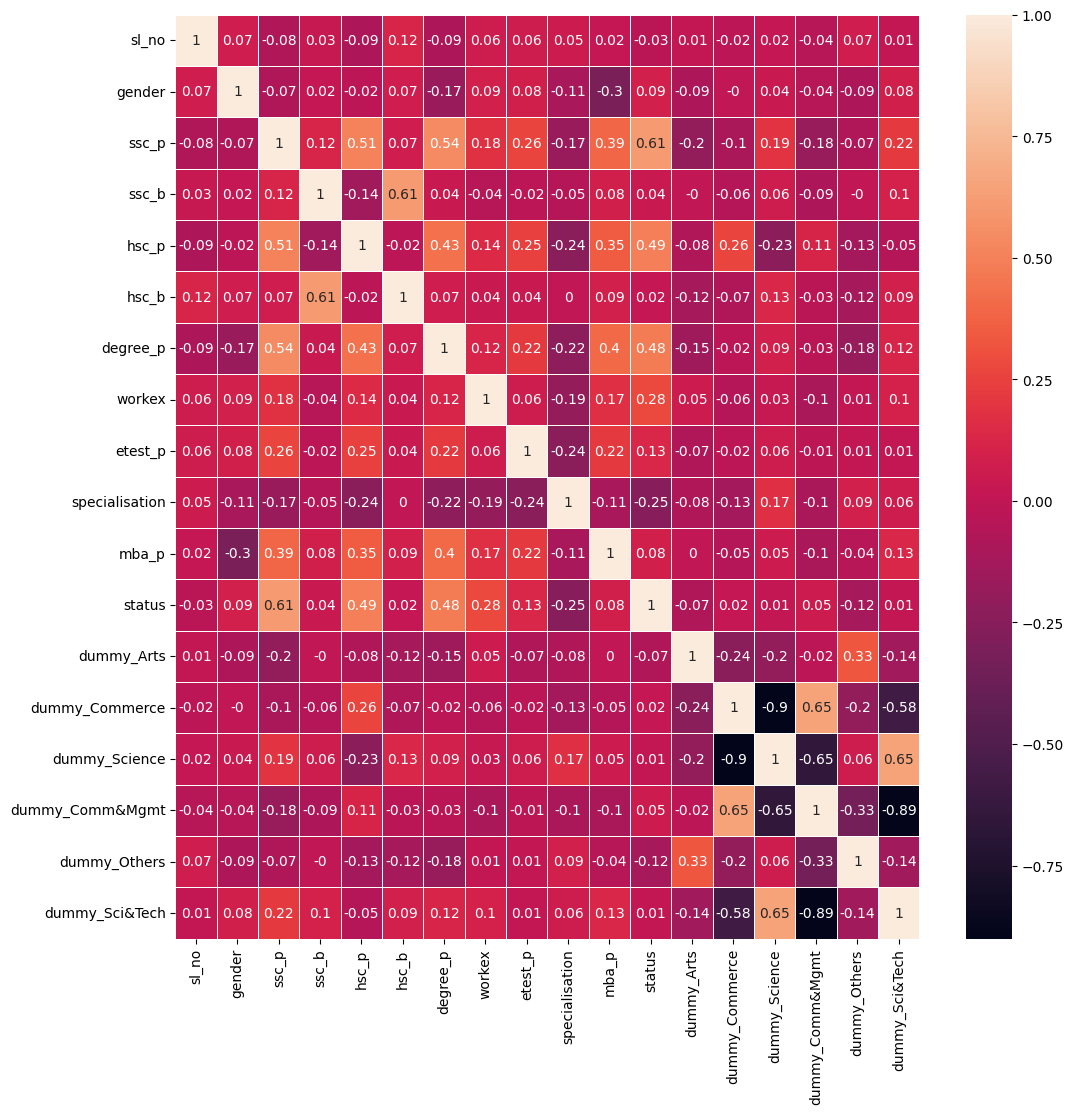

In [200]:
correlation_matrix = dados.corr().round(2)

fig, ax = plt.subplots(figsize=(12,12))    
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Analisando algumas variáveis e sua correlação com a variável status, podemos identificar que as variáveis workex, degree_p, hsc_p e ssc_p possuem uma correlação interessante na contratação.

A maior correlação de status de contratação está com o score de ssc_p, ou seja, pessoas com alto score de ssc_p são mais contratadas.

Text(0.5, 0.98, 'Status e média do ensino médio')

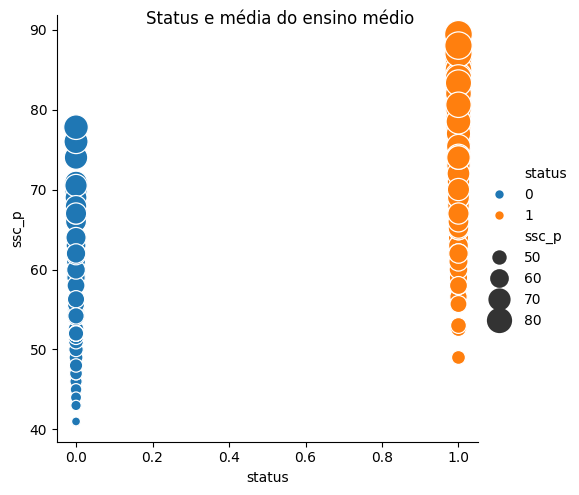

In [201]:


sns.relplot(data = dados, x = 'status', y = 'ssc_p', hue= 'status', size = 'ssc_p', sizes=(40,400))
plt.suptitle('Status e média do ensino médio')



Separando as variáveis para testar o modelo

In [202]:
from sklearn.model_selection import train_test_split

X = dados[['ssc_p', 'hsc_p', 'degree_p', 'workex', 'mba_p']]
y = dados['status']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=7)

In [203]:
#Verifiando a base de treino e teste

print(X_train.shape)
print(X_test.shape)

(172, 5)
(43, 5)


In [204]:
#Deixando os dados padronizador

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_escalonado = scaler.fit_transform(X_train)
X_test_escalonado = scaler.transform(X_test)

In [205]:
from sklearn.neighbors import KNeighborsClassifier

#verificando o melhor valor de K:

error = []

for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k) #valor de K entre 1 e 10
    knn.fit(X_train_escalonado, y_train) #treinando o algoritmo para encontrar o erro
    y_pred = knn.predict(X_test_escalonado) #colocando as previsões na variável y_pred
    error.append(np.mean(y_pred != y_test)) # 'error' armazena a taxa de erro de classificação para cada 'k'.
# np.mean(previsao_y != y_teste) calcula a % de previsões incorretas.
# Quanto menor o valor na lista, melhor o desempenho do modelo KNN.


Text(0, 0.5, 'Média de erro')

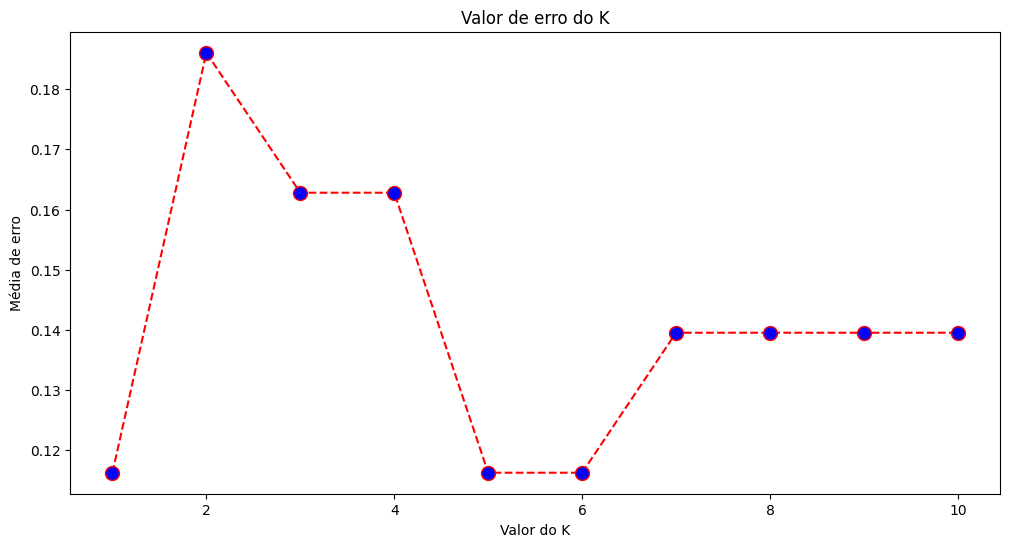

In [206]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Valor de erro do K')
plt.xlabel('Valor do K')
plt.ylabel('Média de erro')

In [207]:
knn = KNeighborsClassifier(n_neighbors= 6)
knn.fit(X_train_escalonado, y_train)
y_previsao = knn.predict(X_test_escalonado)

In [208]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_test, y_previsao)
print(f'A taxa de acerto foi de {acuracia :.2f}')

A taxa de acerto foi de 0.88


O modelo KNN teve uma boa taxa de acerto!                                                  
Testando outro modelo

In [209]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

In [210]:
svm = Pipeline([
    ("linear_svc", LinearSVC())
])

svm.fit(X_train_escalonado, y_train) 

,steps,"[('linear_svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True


In [211]:
y_previsao_svm = svm.predict(X_test_escalonado)
print(accuracy_score(y_test, y_previsao_svm)) 

0.8604651162790697


O modelo LinearSVC também teve uma boa taxa de acerto, no entando o da KNN é um pouco melhor. Ele seria o escolhido entre os dois para o modelo
